#Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install seaborn==0.9.0
from scipy.stats import ranksums
data = pd.read_csv('tips.csv', sep=',')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 KB 5.0 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


##Tradução ou renomear coluna

In [4]:
data.columns
renomear = {'total_bill':'Total',
            'tip':'Gorjeta',
            'dessert':'Sobremesa',
            'day':'Dia_Semana',
            'time':'Hora_do_Dia',
            'size':'Quantidade_de_Pessoas'}

In [5]:
gorjetas = data.rename(columns = renomear)

In [6]:
sim_nao = {'Yes':'Sim',
           'No':'Não'}

In [7]:
gorjetas.Sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: Sobremesa, Length: 244, dtype: object

In [8]:
gorjetas.Sobremesa = gorjetas.Sobremesa.map(sim_nao)

In [9]:
dias= {'Sun':'Domingo',
               'Sat':'Sábado',
               'Thur':'Quinta',
               'Fri':'Sexta'}

In [10]:
gorjetas.Dia_Semana = gorjetas.Dia_Semana.map(dias)

In [11]:
hora = {'Dinner':'Janta',
            'Lunch':'Almoço'}

In [12]:
gorjetas.Hora_do_Dia = gorjetas.Hora_do_Dia.map(hora)

In [13]:
gorjetas.head(10)

,Total,Gorjeta,Sobremesa,Dia_Semana,Hora_do_Dia,Quantidade_de_Pessoas
0,16.99,1.01,Não,Domingo,Janta,2
1,10.34,1.66,Não,Domingo,Janta,3
2,21.01,3.50,Não,Domingo,Janta,3
3,23.68,3.31,Não,Domingo,Janta,2
4,24.59,3.61,Não,Domingo,Janta,4
5,25.29,4.71,Não,Domingo,Janta,4
6,8.77,2.00,Não,Domingo,Janta,2
7,26.88,3.12,Não,Domingo,Janta,4
8,15.04,1.96,Não,Domingo,Janta,2
9,14.78,3.23,Não,Domingo,Janta,2


##Seaborn e scatter

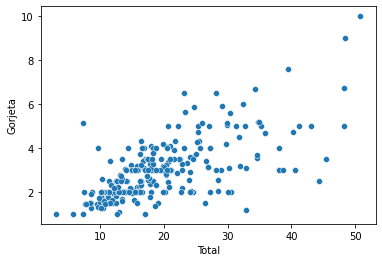

In [14]:
ValorGorjetas = sns.scatterplot(x='Total', y='Gorjeta', data=gorjetas)

In [15]:
print(f'teste vai {gorjetas.shape[0]}')

teste vai 244


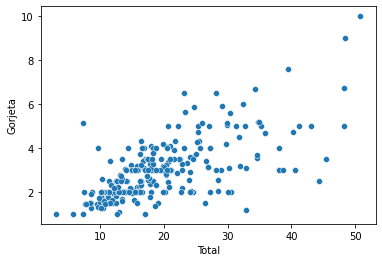

In [16]:
porcentagemSea = sns.scatterplot(x='Total',y='Gorjeta',data=gorjetas)

In [ ]:
#corrigindo a relação da gorjeta com o total da conta
porcentagemLinha = sns.relplot(x='Total',y='Porcentagem', kind='line', data=gorjetas)

##Adicionar coluna de porcentagem

In [19]:
gorjetas['Porcentagem'] = gorjetas['Gorjeta'] / gorjetas['Total']


In [20]:
gorjetas.Porcentagem = gorjetas.Porcentagem.round(3)

In [21]:
gorjetas.head(10)

,Total,Gorjeta,Sobremesa,Dia_Semana,Hora_do_Dia,Quantidade_de_Pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Janta,2,0.059
1,10.34,1.66,Não,Domingo,Janta,3,0.161
2,21.01,3.50,Não,Domingo,Janta,3,0.167
3,23.68,3.31,Não,Domingo,Janta,2,0.140
4,24.59,3.61,Não,Domingo,Janta,4,0.147
5,25.29,4.71,Não,Domingo,Janta,4,0.186
6,8.77,2.00,Não,Domingo,Janta,2,0.228
7,26.88,3.12,Não,Domingo,Janta,4,0.116
8,15.04,1.96,Não,Domingo,Janta,2,0.130
9,14.78,3.23,Não,Domingo,Janta,2,0.219


##Tipos de Análises

In [ ]:
#relação de gorjeta com pedir sobremesa

#Não pediu
gorjetas[gorjetas.Sobremesa == 'Não'].describe().round(2)

#Pediu
gorjetas[gorjetas.Sobremesa == 'Sim'].describe().round()

In [ ]:
#Jogando essas relações em um gráfico categórico
sns.catplot(x='Sobremesa',y='Gorjeta',data = gorjetas)

In [ ]:
#Jogando as relaçoes em um gráfico relacional
sns.relplot(x='Total', y='Gorjeta', hue='Sobremesa', col='Sobremesa', data=gorjetas)#hue é 'subtitulo' é muda cor do do outro dado analisado
                                                                                    #col divide em 2 gráficos com os parametros passados

In [ ]:
#L M plot traça uma linha de progressão no gráfico
sns.lmplot(x='Gorjeta',y='Porcentagem', col='Sobremesa',hue='Sobremesa', data=gorjetas )
#deixando mais claro a diferença de gorjeta entre quem pediu sobremesa e quem não pediu

In [ ]:
#transformando a visualização com kind
sns.relplot(x='Total',y='Gorjeta', col='Sobremesa', hue='Sobremesa', kind='line' , data=gorjetas)

In [ ]:
#Filtrar de maneira específica a relação usando ranksums
sobremesaSim = gorjetas.query("Sobremesa == 'Sim'").Porcentagem

In [ ]:
sobremesaNao = gorjetas.query("Sobremesa == 'Não'").Porcentagem

In [ ]:
rankS = ranksums(sobremesaSim, sobremesaNao)

##Analisando a relação de gorjeta com o dia da semana

In [ ]:
#Gráfico categórico
sns.catplot(x='Dia_Semana',y='Gorjeta',data=gorjetas)

In [ ]:
#Gráfico relacional
sns.relplot(x='Total', y='Porcentagem', hue='Dia_Semana', col='Dia_Semana', data=gorjetas)

In [ ]:
#Relacional com traçado ao centro
sns.lmplot(x='Total', y='Porcentagem', hue='Dia_Semana', col='Dia_Semana', data=gorjetas)

##Média geral das gorjetas

In [45]:
#Média de todos os dias de gorjetas
mediaGorjeta = gorjetas.Gorjeta.mean().round(2)
print(f'A média de gorjetas foi {mediaGorjeta}')

A média de gorjetas foi 3.0


In [ ]:
#Média dos dias específico
gorjetas.groupby(['Dia_Semana']).mean().round(2)[['Total','Gorjeta','Porcentagem']]

##Boxplot e violinplot

In [ ]:
#Visualização do valor da conta sobre o horário da refeição _utilizando kin_
sns.catplot(x='Hora_do_Dia',y='Total', hue='Hora_do_Dia', kind='swarm', data=gorjetas)

In [ ]:
#visualização com o violinplot
sns.violinplot(x='Hora_do_Dia',y='Total', data = gorjetas)

In [ ]:
#Visualização com Boxplot
sns.boxplot(x='Hora_do_Dia',y='Total',data=gorjetas)

In [57]:
#Visualização com Histograma
almoco = gorjetas.query("Hora_do_Dia == 'Almoço'").Total
janta = gorjetas.query("Hora_do_Dia == 'Janta'").Total

In [ ]:
sns.histplot(almoco)
#ou
sns.displot(janta)